In [1]:
from faster_rcnn.datasets.factory import get_imdb
import faster_rcnn.roi_data_layer.roidb as rdl_roidb
from faster_rcnn.roi_data_layer.layer import RoIDataLayer
from faster_rcnn.fast_rcnn.config import cfg, cfg_from_file

import cv2
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
# load config
cfg_file = 'experiments/cfgs/faster_rcnn_end2end.yml'
cfg_from_file(cfg_file)

In [3]:
# imdb_name = 'kittivoc_train'
imdb_name = 'kittipose_train'

# load data
imdb = get_imdb(imdb_name)
rdl_roidb.prepare_roidb(imdb)
roidb = imdb.roidb
# roidb is a database, containing bounding box info for all training images

<bound method kittipose.default_roidb of <faster_rcnn.datasets.kittipose.kittipose object at 0x7f46a2c597d0>>
Remove empty annotations:  005066 004339 004040 003383 001752 001091 000547 Done. 
kittipose_train gt roidb loaded from /home/pculbert/Documents/faster_rcnn_pytorch/data/cache/kittipose_train_gt_roidb.pkl


In [4]:
print roidb[1]['poses'] # roidb is a list of dictionaries. Length is the entire number of images

[[  1.67   1.87   3.69 -16.53   2.39  58.49   1.57]
 [  1.86   0.6    2.02   4.59   1.32  45.84  -1.55]]


In [5]:
print roidb[0]

img_name = roidb[0]['image'][0:-10]
print img_name

idx = roidb[0]['image'][-10:-3]
print idx

idx += "png"
print idx

disp_name = img_name + 'disparity/' + idx
print disp_name

{'gt_classes': array([1], dtype=int32), 'dontcare_areas': array([], shape=(0, 4), dtype=int32), 'max_classes': array([1]), 'image': '/home/pculbert/Documents/faster_rcnn_pytorch/data/KITTIPOSE/JPEGImages/000000.jpg', 'dontcare_poses': array([], shape=(0, 7), dtype=float32), 'boxes': array([[712, 143, 810, 307]], dtype=int32), 'flipped': False, 'height': 370, 'width': 1224, 'gt_ishard': array([0], dtype=int32), 'max_overlaps': array([1.], dtype=float32), 'poses': array([[1.89, 0.48, 1.2 , 1.84, 1.47, 8.41, 0.01]], dtype=float32), 'seg_areas': array([16335.], dtype=float32), 'gt_overlaps': <1x4 sparse matrix of type '<type 'numpy.float32'>'
	with 1 stored elements in Compressed Sparse Row format>}
/home/pculbert/Documents/faster_rcnn_pytorch/data/KITTIPOSE/JPEGImages/
000000.
000000.png
/home/pculbert/Documents/faster_rcnn_pytorch/data/KITTIPOSE/JPEGImages/disparity/000000.png


In [6]:
data_layer = RoIDataLayer(roidb, imdb.num_classes)

In [7]:
blobs = data_layer.forward()
im_data = blobs['data'] # one image, shape = (1, 302, 1000, 3)
im_info = blobs['im_info'] # stores H, W, scale
gt_boxes = blobs['gt_boxes']
gt_ishard = blobs['gt_ishard']
dontcare_areas = blobs['dontcare_areas']

In [8]:
print blobs.keys()

['im_info', 'dontcare_areas', 'dontcare_poses', 'gt_ishard', 'gt_boxes', 'gt_poses', 'im_name', 'data', 'data_disp']


In [17]:
#print blobs['gt_poses']
#print blobs['gt_boxes']
#print blobs['im_name']

[[  1.6    1.76   3.84  -0.77   1.1   34.65  -1.59]
 [  1.43   1.64   3.99  -4.62   1.56   7.89  -1.56]
 [  1.4    1.66   4.07  -8.51   1.47  15.29  -1.57]
 [  1.35   1.57   3.72  -4.54   1.42  17.17  -1.57]
 [  1.44   1.58   3.66  -9.02   1.34  25.05  -1.58]
 [  1.49   1.64   3.95  -5.39   1.3   25.27  -1.58]
 [  1.6    1.66   3.82 -12.07   1.5   16.12  -1.58]]
[[460.9186  140.2095  492.34488 168.41257   2.     ]
 [  0.      155.51974 270.7494  302.17566   2.     ]
 [ 82.99758 150.68494 233.68251 214.34328   2.     ]
 [289.28284 150.68494 376.30942 203.06204   2.     ]
 [245.76955 145.85013 312.6511  182.917     2.     ]
 [336.01935 144.23851 392.42548 181.3054    2.     ]
 [  0.      145.04431 129.73409 210.31427   2.     ]]


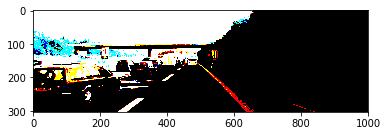

In [12]:
plt.imshow(im_data[0,:,:,:])

In [ ]:
disp_data = blobs['data_disp']
print disp_data.shape # note: original disparity file has 3 identical channels
                      # we only take one channel
print disp_data.dtype
plt.imshow(np.uint8(disp_data[0,:,:,0])) # must convert to uint8 in order to plot

(376, 1241, 3)


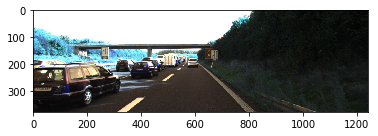

In [14]:
# read a sample rgb image
fn = "/home/pculbert/Documents/faster_rcnn_pytorch/data/KITTIVOC/JPEGImages/000558.jpg"
im = cv2.imread(fn)
print im.shape
plt.imshow(im)

(376, 1241, 3)
uint8
0
0


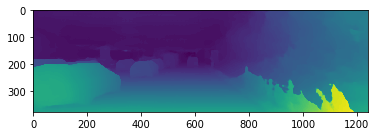

In [15]:
# read a sample disparity image
# note that the disparity map is a 3 IDENTICAL channel rgb!
# we only need to use one channel
fn = "/home/pculbert/Documents/faster_rcnn_pytorch/data/KITTIVOC/JPEGImages/disparity/000558.png"
im = cv2.imread(fn)
print im.shape
print im.dtype
#plt.imshow(im)

im0 = im[:,:,0]
im1 = im[:,:,1]
im2 = im[:,:,2]

print np.sum(im0-im1)
print np.sum(im0-im2)

plt.imshow(im0) # only plot one channel